# Data Augmentation

## data set에 대해서 , test/ train dataset 간에 차이가 남
- variation이 크기 때문에 정확도가 많이 떨어짐.


## 기하학적인 변형이 일어날 경우 

> 기존 opencv
- 특징점을 사람이 찾아야 하기 때문에
- 차원, 크기에만 적용 가능

> 딥러닝
- 가변적인 특징에 적용할 수 있는 알고리즘

> 기하학적인 변형을 만들어 train, test 에 대한 variation을 줄어들게 하기
- inperpolation(보간법) 사용
- 가짜 데이터를 넣어서(원래 데이텅 대해서 노이즈를 섞어서 ...

> 데이터가 너무 작아서
- overfitting이 발생

> 너무 많이 넣어주면..
- 노이즈가 너무 많아져서 성능이 안좋아질 수 있음..
- 적당히!

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
import tensorflow as tf
import numpy as np
from numpy  import expand_dims
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
np.random.seed(15)

Using TensorFlow backend.


# Data Augmentation


dataset 이 너무 적은 경우 overfitting 문제가 발생함

![data augmetation](keras_data_augmentation_jitter.png)


keras에서는 dta augmentation을 통해 해결


- Translations
- Rotations
- Changes in scale
- Shearing
- Horizontal (and in some cases, vertical) flips

![image data augmetation](keras_data_augmentation_random_adjustments.jpg)


Type #1: existing dataset을 사용해 학습 dataset를 재구성함
  
<img src=keras_data_augmentation_dataset_generation.png width=300>
  
  

Type #2: In-place/on-the-fly data augmentation - keras에서 구현
   batch 수 만큼 ImageDataGenerator로 실시간 생성 후 원본 제외하고 생성된 데이터 셋으로 학습

<img src=keras_data_augmentation_in_place.png width=300>

잘못된 방식
<img src=keras_data_augmentation_incorrect.png  width=300>

In [10]:
# keras로 이미지 읽기
img = tf.keras.preprocessing.image.load_img('1.jpg')
data = tf.keras.preprocessing.image.img_to_array(img)
sample = expand_dims(data,0)
sample.shape

(1, 500, 750, 3)

In [19]:
# opencv로 이미지 읽기
data = cv2.imread('1.jpg', 1)
data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
sample = expand_dims(data,0)
sample.shape

(1, 500, 750, 3)

# 1. ImageDataGenerator.flow 

## 1.1. 수평, 수직 이동

### 1.1.1. width_shift

In [20]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range= 0.2)
obj = generator.flow(sample, batch_size = 1)

### imageDataGenerator할 때는 무조건 결과가 float가 나옴
- 1. uint8로 바꾸거나
- 2. 255로 나누거나
- 3. rescale옵션
- => 둘 중 하나는 꼭 해야함


(1, 500, 750, 3)
float32
(500, 750, 3)


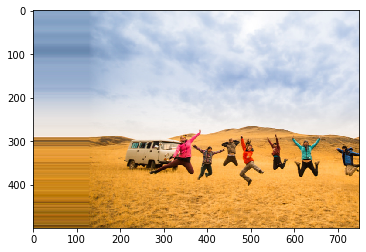

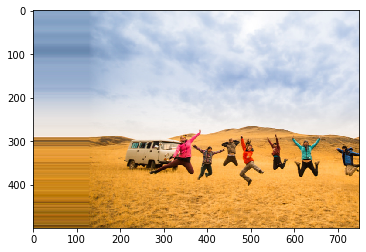

In [33]:
# 할때마다 다른 이미지 나온다.-> generator이기 때문
image = obj.next()
print(image.shape) 
print(image.dtype) # interpolation 하므로 항상 float형식! 
print(image[0].shape)
plt.imshow(image[0].astype('uint8'))
plt.show()
plt.imshow(image[0]/255)
plt.show()

### 1.1.2 width_shift, rescale

In [34]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(    
    width_shift_range = 0.2, rescale=1./255)   # rescale 해주면 정규화하고, imshow할때 type변한 필유없다.
obj = generator.flow(sample, batch_size=1)  

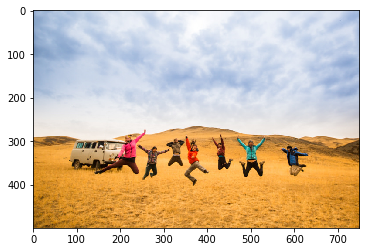

In [35]:
image = obj.next()
plt.imshow(image[0] )

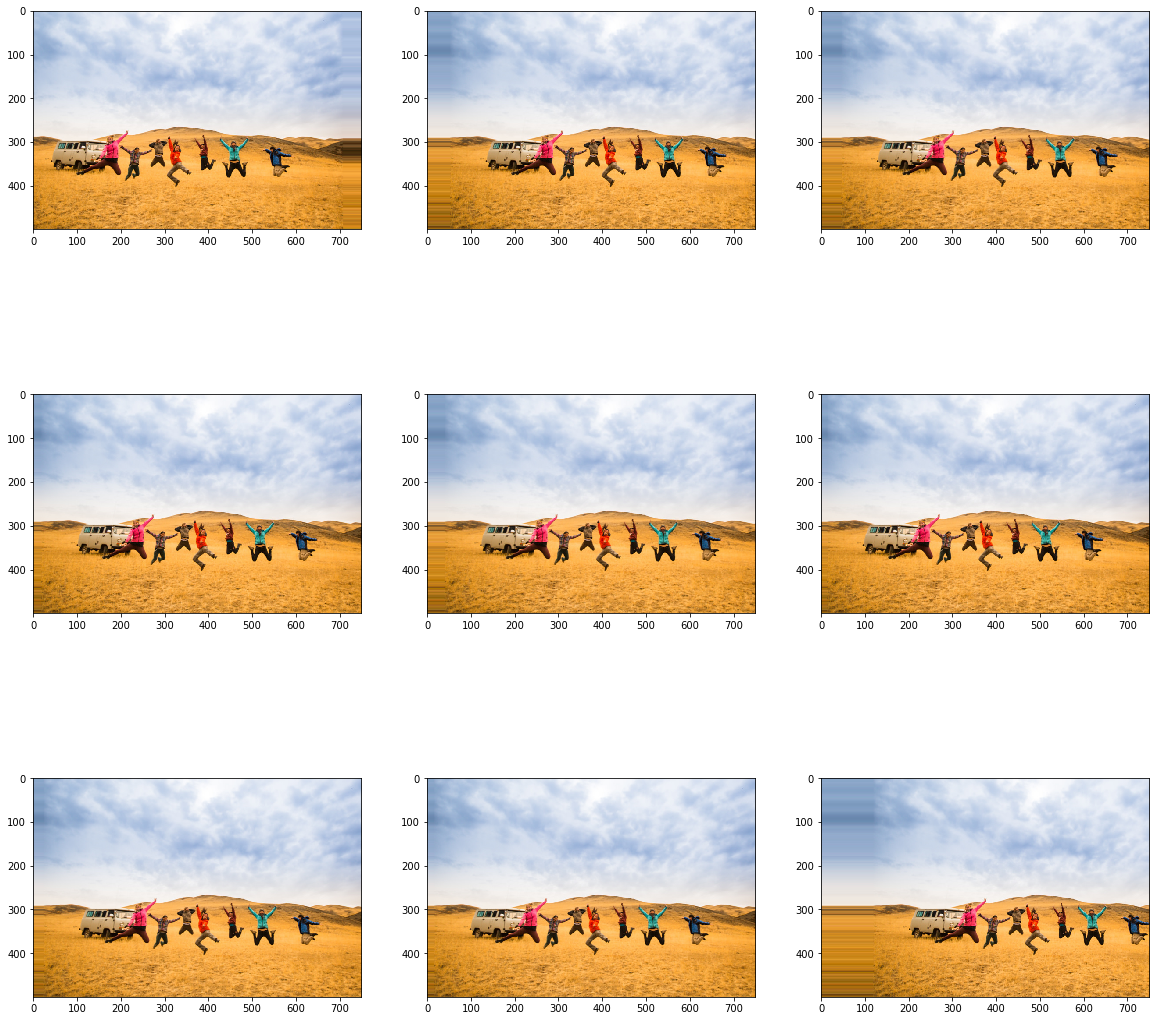

In [36]:
fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0]) 

## 1.2. flip 

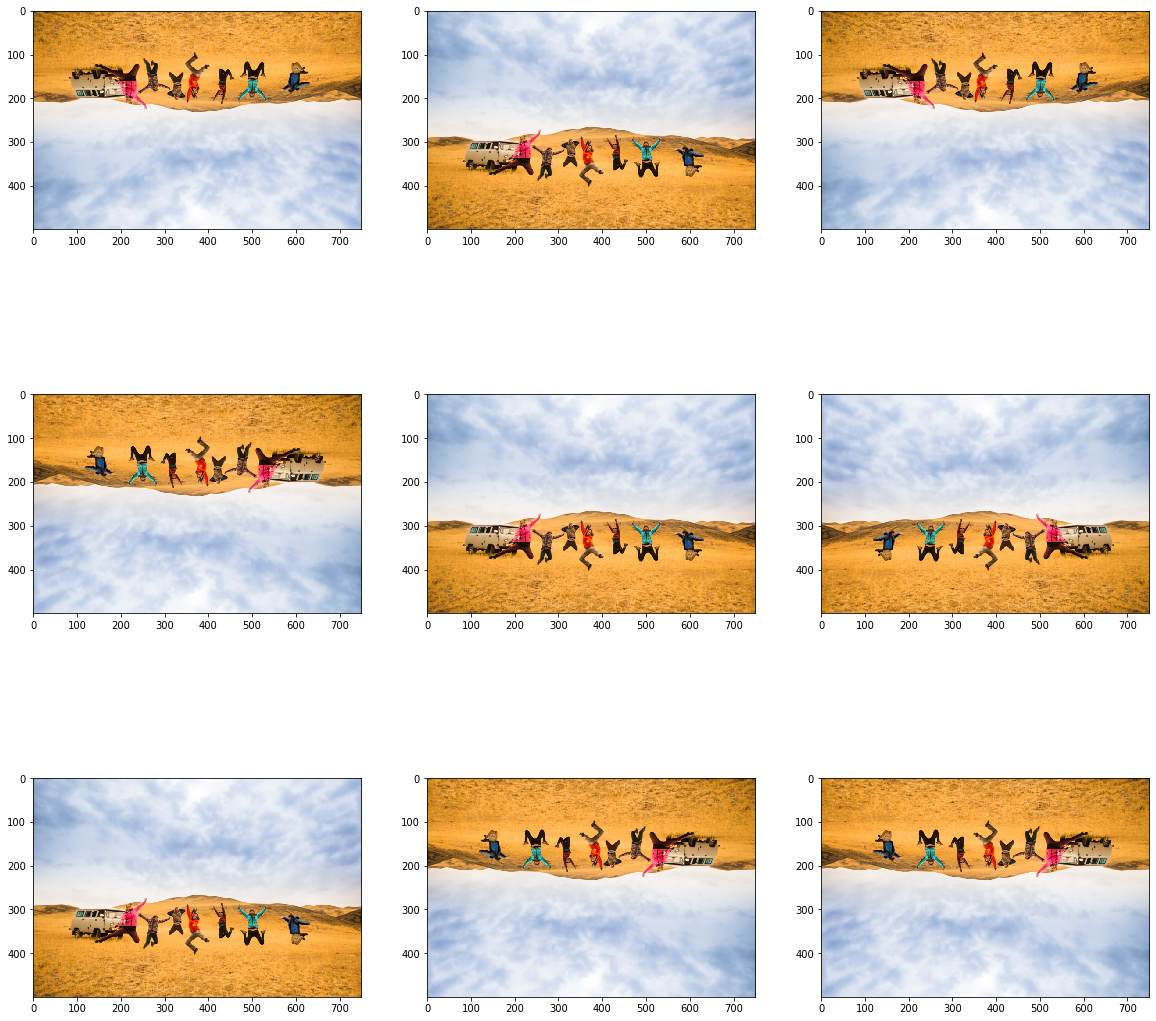

In [38]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    horizontal_flip = True, vertical_flip = True,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0]) 


## 1.3. brightness

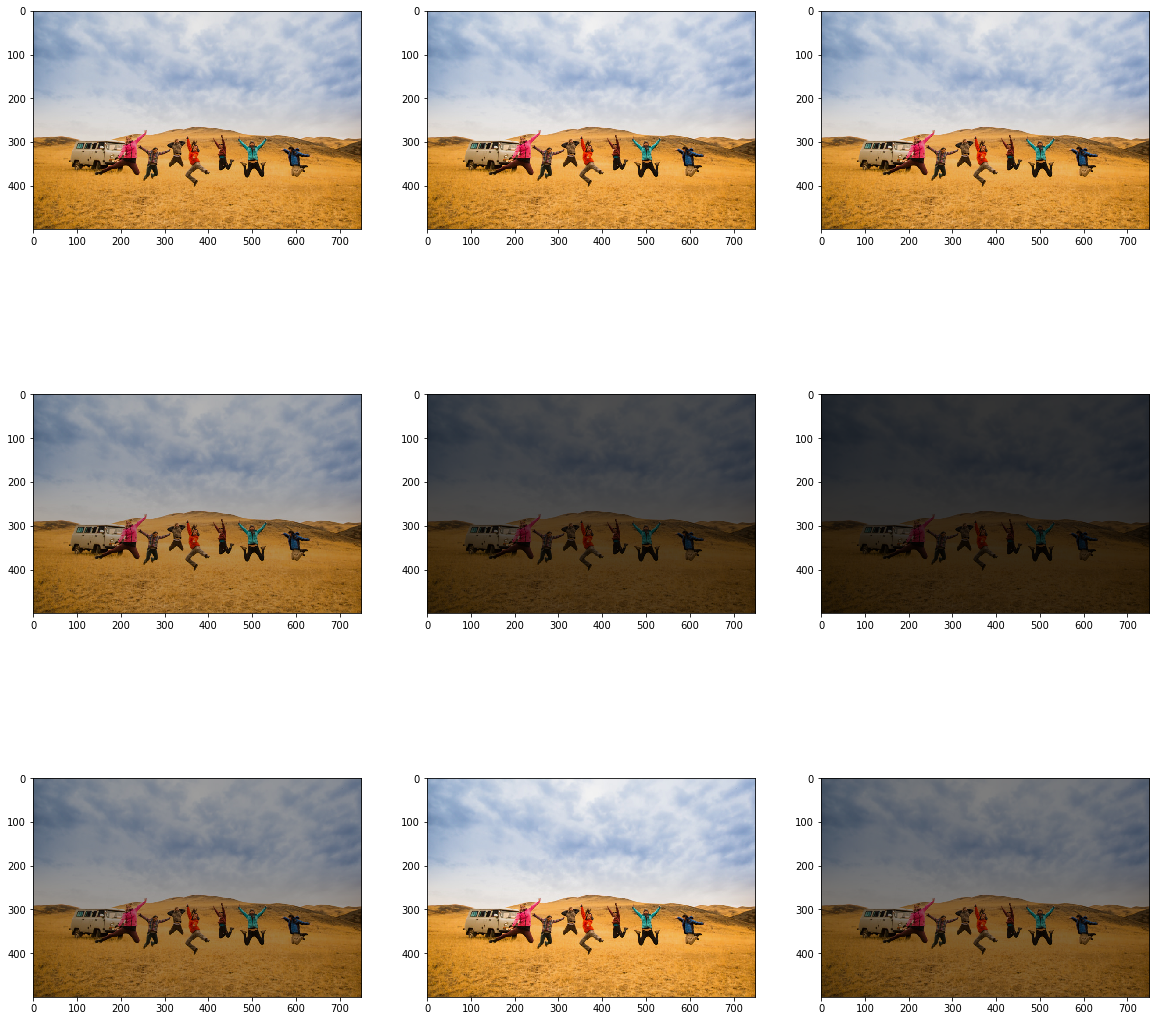

In [39]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    brightness_range=[0.2, 1.0],       
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

## 1.4 rotation

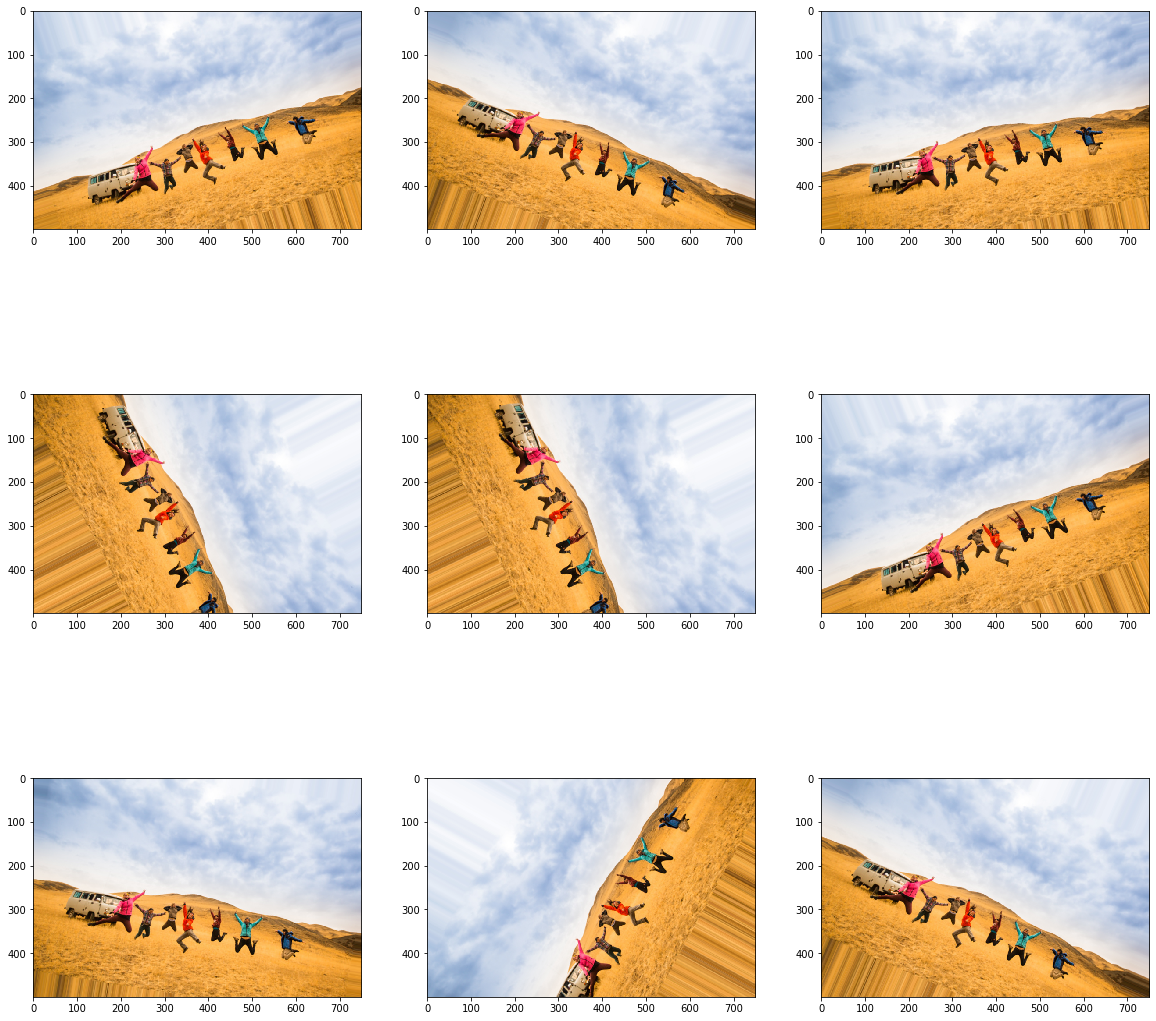

In [40]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    rotation_range=90,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0]) 

## 1.5 zoom_range

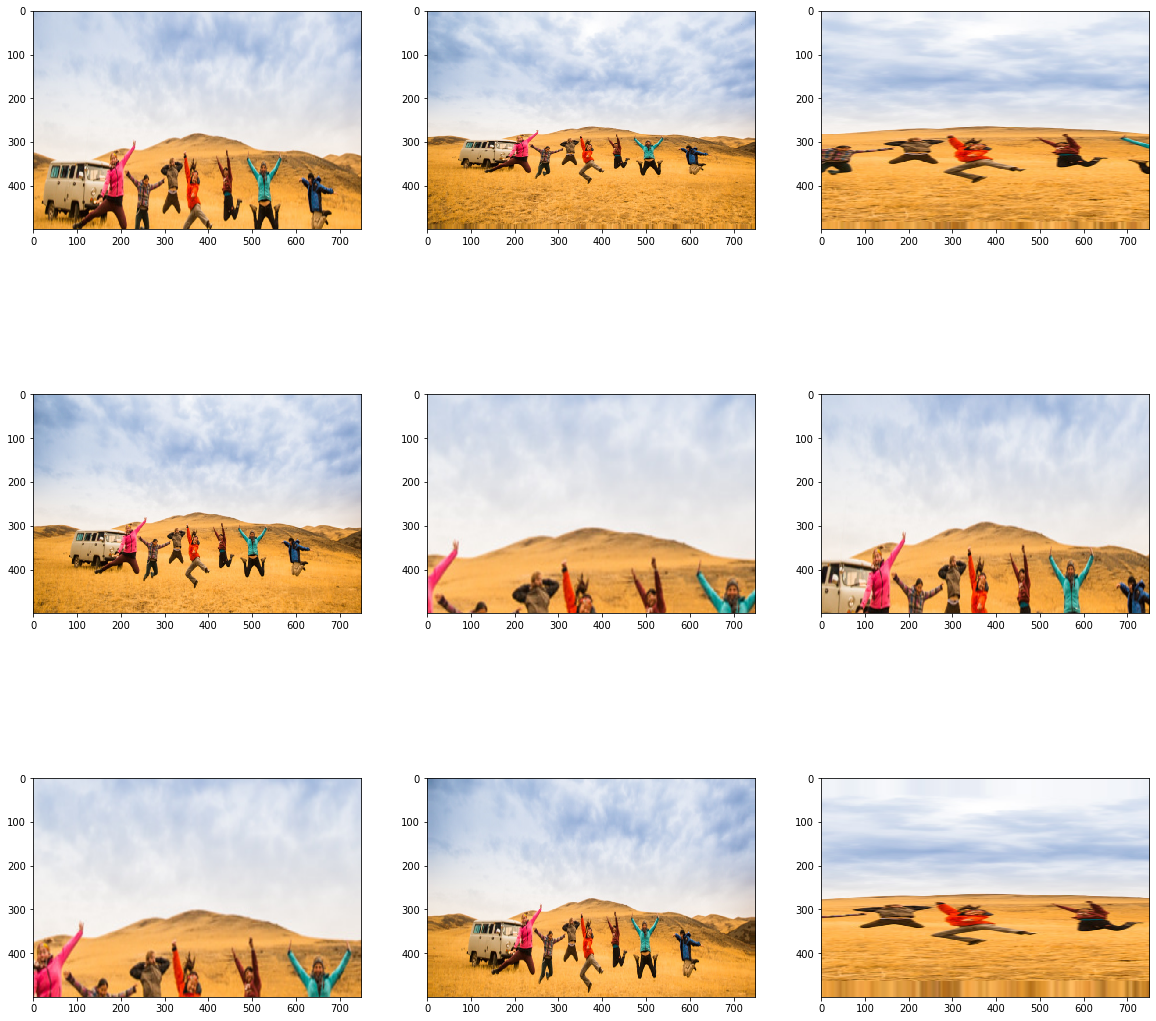

In [41]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    zoom_range=[0.2, 1.2],   
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

## 1.5. 한꺼번에 적용

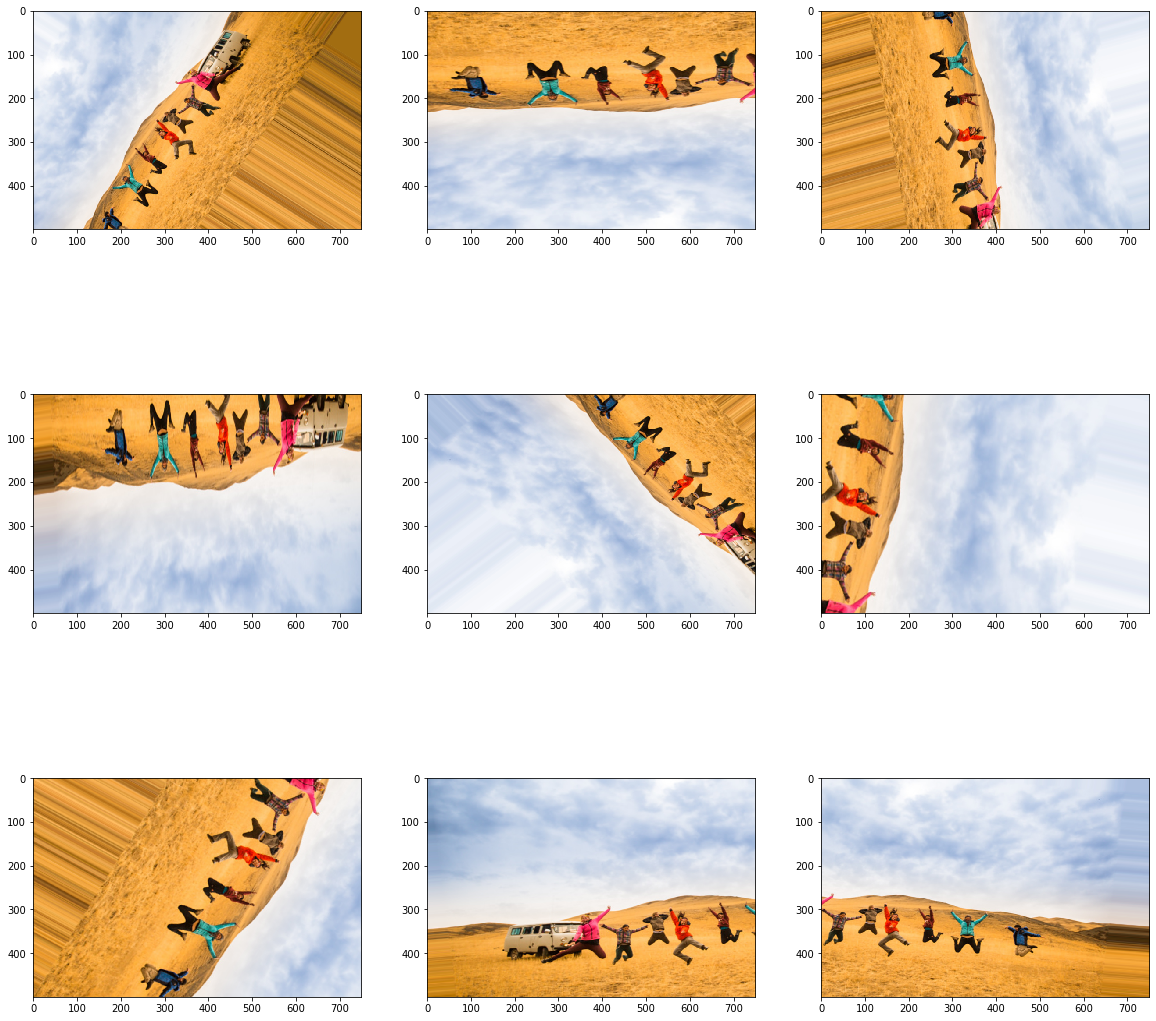

In [44]:
# 한꺼번에 적용하기
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    width_shift_range = 0.2,
    zoom_range=[0.5, 1.0],   
    horizontal_flip = True, vertical_flip = True,
    rotation_range=90,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)
# batch size만큼 사용하는데... 위의 효과도 랜덤으로 사용..

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])  

## 1.6. 저장

In [43]:
# 파일로 저장하기
obj = generator.flow(sample, batch_size=1, save_to_dir='tmp',  # 폴더는 생성되어 있어야 함
    save_prefix="image", save_format="jpg")    

# 5번 저장
for i in range(0, 5):
    obj.next()    

# 2. ImageDataGenarator.flow_from_dirictory()

In [49]:
train_path = './hard_handwriting_shape/train/'

obj = generator.flow_from_directory(
    train_path,
    target_size = (150, 150),   # 읽어드릴 이미지, 이미지 크기를 맞춰야 하기 때문에 생략시 256x256
    batch_size = 4,   # 45개 이미지 중에서 한번에 생성할 이미지 수 
    class_mode = 'binary' )  # # binary(label)  |  categorical(one-hot)

Found 45 images belonging to 3 classes.


In [51]:
iterations = 10

# batch size = 4이므로, 4개씩 호출
for i, (img, label) in enumerate(obj):
    n_img = len(label)    # 폴더에 있는 이미지 갯수 만큼 리턴한다.
    print(label)
    print(img.shape)
    if i is iterations - 1:
        break      
# 결과를 보면 lable은 1,1,1,0 처럼 꼭 c1과 c2에서 규일하게 생성되는것은 아니다.

[0. 0. 2. 0.]
(4, 150, 150, 3)
[1. 0. 2. 1.]
(4, 150, 150, 3)
[0. 2. 0. 0.]
(4, 150, 150, 3)
[0. 1. 2. 0.]
(4, 150, 150, 3)
[2. 0. 1. 1.]
(4, 150, 150, 3)
[2. 1. 1. 2.]
(4, 150, 150, 3)
[1. 1. 2. 1.]
(4, 150, 150, 3)
[0. 2. 1. 1.]
(4, 150, 150, 3)
[2. 0. 2. 1.]
(4, 150, 150, 3)
[1.]
(1, 150, 150, 3)


## 2.1. 저장하기

In [55]:
# 저장하기
obj = generator.flow_from_directory(
    train_path,
    target_size = (150, 150),   # 읽어드릴 이미지, 이미지 크기를 맞춰야 하기 때문에 생략시 256x256
    batch_size = 4,   # 8개 이미지 중에서 최대4개 만들어냄
    class_mode = 'binary',
    save_prefix="image", save_format="jpg",save_to_dir='tmp')

iterations = 2

for i, (img, label) in enumerate(obj):
    n_img = len(label)    # 폴더에 있는 이미지 갯수 만큼 리턴한다.
    print(label)
    print(img.shape)
    if i is iterations - 1:
        break
# tmp 폴더하나에 8개이미지 저장 class별로 저정할수 없나?( 좀더 찾아바야함)

Found 45 images belonging to 3 classes.
[0. 1. 1. 2.]
(4, 150, 150, 3)
[2. 2. 1. 0.]
(4, 150, 150, 3)
